## Observations and Insights 

In [83]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data =pd.merge(mouse_metadata, study_results, how="outer")
# Display the data table for preview
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [84]:
# Checking the number of mice.
num_mice = len(combined_data["Mouse ID"].unique())

In [85]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
timeframe = combined_data["Timepoint"].value_counts()
ID_mouse_count = combined_data["Mouse ID"].value_counts()

dup_mice = ID_mouse_count.loc[ID_mouse_count>len(timeframe)]
dup_mice


g989    13
Name: Mouse ID, dtype: int64

In [86]:
# Optional: Get all the data for the duplicate mouse ID. 
data_for_dup = combined_data.loc[combined_data["Mouse ID"] == "g989"]
data_for_dup

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [87]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data.loc[combined_data["Mouse ID"] != "g989"]
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [88]:
# Checking the number of mice in the clean DataFrame.
len(clean_data["Mouse ID"].unique())

248

## Summary Statistics

In [89]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
DR_mean = clean_data.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
DR_median = clean_data.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
DR_variance = clean_data.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
DR_std = clean_data.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
DR_sem = clean_data.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]


SSDR = pd.DataFrame({
    "Mean" : DR_mean,
    "Median" : DR_median,
    "Variance" : DR_variance,
    "Stand. Dev." : DR_std,
    "SEM" : DR_sem 
})

SSDR


,Mean,Median,Variance,Stand. Dev.,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

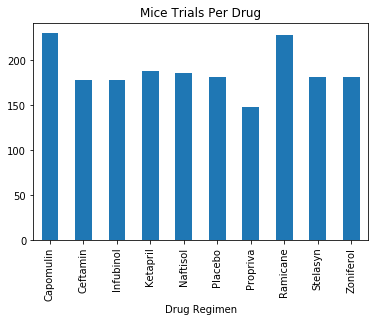

In [90]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mice_treatment = clean_data.groupby("Drug Regimen").count()["Mouse ID"]
mice_treatment.plot(kind="bar",title="Mice Trials Per Drug",)

Text(0, 0.5, 'Number of Trials')

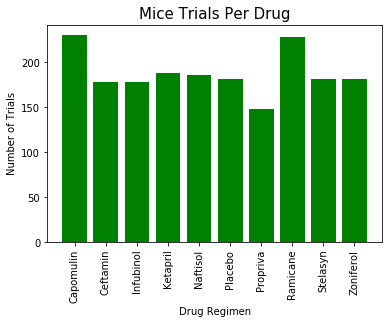

In [91]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
#mice_treatment.reset_index()
xaxis = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]
yaxis = [230,178,178,188,186,181,148,228,181,182]
plt.bar(xaxis,yaxis, color='g', )
plt.xticks(rotation=90)
plt.title('Mice Trials Per Drug', fontsize=15)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Trials")

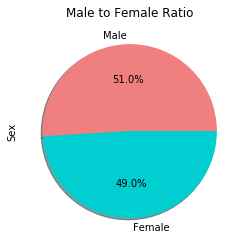

In [92]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
x = clean_data["Sex"].value_counts()
x.plot(kind="pie", colors=["lightcoral","darkturquoise"],autopct="%1.1f%%", shadow=True, title= "Male to Female Ratio")


Text(0.5, 1.0, 'Male to Female Ratio')

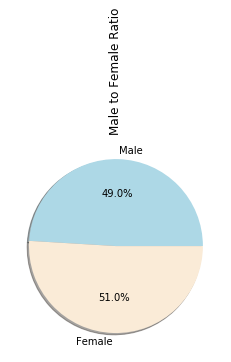

In [93]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
Male = 922
Female = 958
MtoFratio = [Male,Female]
colors = ["lightblue","antiquewhite"]
labels = ["Male","Female"]
plt.pie(MtoFratio, labels=labels, autopct="%1.1f%%", shadow=True,colors=colors,)
plt.title("Male to Female Ratio",rotation=90,)


In [94]:
clean_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Quartiles, Outliers and Boxplots

In [95]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint = clean_data.groupby(clean_data["Mouse ID"])["Timepoint"].max().to_frame()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged = pd.merge(greatest_timepoint,clean_data,on=["Mouse ID", "Timepoint"])[[ "Mouse ID",'Drug Regimen','Timepoint', 'Tumor Volume (mm3)']]
fourdrugs = merged.loc[(merge["Drug Regimen"] == "Capomulin") | (merge["Drug Regimen"] == "Ramicane") | (merge["Drug Regimen"] == "Infubinol") | (merge["Drug Regimen"] == "Ceftamin")]
fourdrugs.sort_values(by="Drug Regimen")


,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
115,l897,Capomulin,45,38.846876
85,j119,Capomulin,45,38.125164
87,j246,Capomulin,35,38.753265
192,u364,Capomulin,45,31.023923
66,g316,Capomulin,45,40.159220
...,...,...,...,...
91,j913,Ramicane,45,31.560470
93,j989,Ramicane,45,36.134852
96,k403,Ramicane,45,22.050126
119,m546,Ramicane,45,30.564625


In [136]:
# Put treatments into a list for for loop (and later for plot labels)
drugname = ["Capomulin","Ceftamin","Infubinol","Ramicane"]

# Create empty list to fill with tumor vol data (for plotting)

drugvalues = []
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for x in drugname:
    drugs = fourdrugs.loc[fourdrugs["Drug Regimen"] == x]["Tumor Volume (mm3)"]
    drugvalues.append(drugs)
  
    quartiles = drugs.quantile([.25,.5,.75])
    lowquart = quartiles[0.25]
    uppquart = quartiles[0.75]
    IQR = uppquart-lowquart
    lowbound = lowquart - (1.5*IQR)
    uppbound = uppquart + (1.5*IQR)
    # Determine outliers using upper and lower bounds
    outliers = drugs.loc[(drugs < lowbound) | (drugs > uppbound)]
outliers


Series([], Name: Tumor Volume (mm3), dtype: float64)

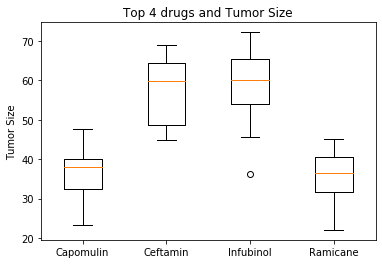

In [124]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Top 4 drugs and Tumor Size')
ax1.set_ylabel('Tumor Size')
plt.boxplot(drugvalues, labels = drugname,showfliers=True)
plt.show()

## Line and Scatter Plots

Text(0.5, 0, 'g316: Tumor Size Over Time')

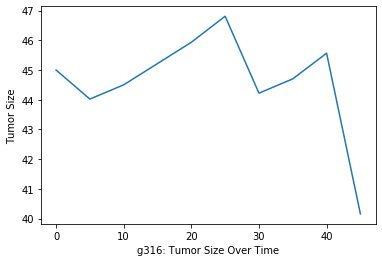

In [165]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

indmouse = clean_data.loc[clean_data["Mouse ID"] == "g316"]
plt.plot(indmouse["Timepoint"], indmouse["Tumor Volume (mm3)"],)
plt.xlabel("Times")
plt.ylabel("Tumor Size")
plt.xlabel("g316: Tumor Size Over Time")

In [166]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
